In [185]:
import torch

import numpy as np

import torch.nn as nn 

import torch.optim as optim

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split

simple synthetic dataset where a small neural network can overfit easily — that way we can clearly see how regularization helps

1. Create dataset

In [186]:
X,y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X = torch.tensor(X, dtype = torch.float32)

y = torch.tensor(y, dtype = torch.float32).reshape(-1,1)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,  test_size=0.3, random_state=42)

2. Define simple NN

In [188]:
class SimpleNN(nn.Module):

    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(2,16)

        self.out = nn.Linear(16,1)

        self.relu = nn.ReLU()

        self.sigmoid = nn.Sigmoid()

    
    def forward(self, x):

        x = self.relu(self.hidden(x))

        x = self.sigmoid(self.out(x))

        return x

3. Train function

In [189]:
def train_model(model, optimizer, X_train, y_train, X_test, y_test, epochs=300):

    loss_fn = nn.BCELoss()

    train_losses, test_losses = [], []

    for epoch in range(epochs):

        model.train()

        optimizer.zero_grad()

        outputs = model(X_train)

        loss = loss_fn(outputs, y_train)

        loss.backward()

        optimizer.step()

        # Evaluation

        model.eval()

        with torch.no_grad():

            train_losses.append(loss.item())

            test_loss = loss_fn(model(X_test), y_test).item()

            test_losses.append(test_loss)

    return train_losses, test_losses

4. Train Without Regularization

In [190]:
model_no_reg = SimpleNN()

optimizer_no_reg = optim.Adam(model_no_reg.parameters(), lr=0.01)

losses_no_reg, test_losses_no_reg = train_model(model_no_reg, optimizer_no_reg, X_train, y_train, X_test, y_test)

5. Train With L2 Regularization (weight_decay)

In [191]:
model_l2 = SimpleNN()

optimizer_l2 = optim.Adam(model_l2.parameters(), lr=0.01, weight_decay=0.01)  # L2 regularization

losses_l2, test_losses_l2 = train_model(model_l2, optimizer_l2, X_train, y_train, X_test, y_test)

6. Plotting Loss Comparison

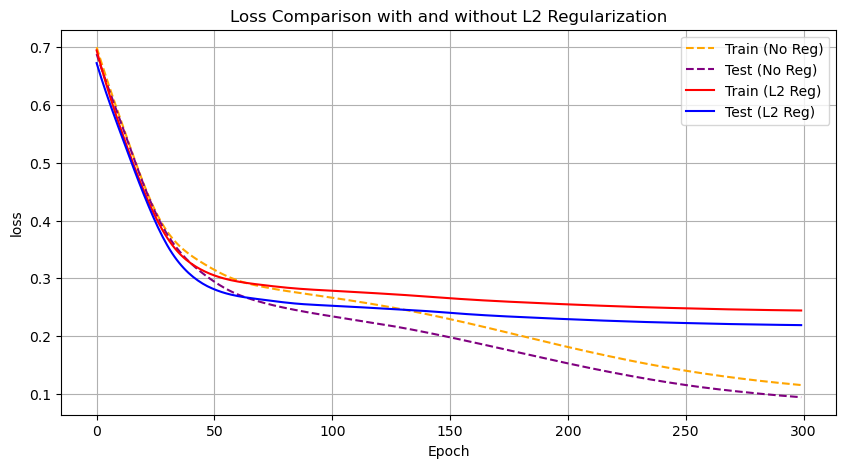

In [192]:
plt.figure(figsize=(10,5))

plt.plot(losses_no_reg, label='Train (No Reg)', linestyle='--',color='orange')

plt.plot(test_losses_no_reg, label='Test (No Reg)', linestyle='--', color='purple')

plt.plot(losses_l2, label='Train (L2 Reg)', color= 'red')

plt.plot(test_losses_l2, label='Test (L2 Reg)', color='blue')

plt.title("Loss Comparison with and without L2 Regularization")

plt.xlabel('Epoch')

plt.ylabel('loss')

plt.legend()

plt.grid(True)

plt.show()